#Задача
Привести уравнение кривой 
$x^2+y^2+xy-3x-3y+2=0$
к каноническому виду и построить эту кривую.

In [0]:
import sys
import matplotlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
from sympy.abc import x,y
sp.init_printing(use_latex='matplotlib')
from IPython.display import Math, HTML

Ввести параметры
$A,B,C,D,E,F$ 
(
[1](https://www.wolframalpha.com/input/?i=3*x*x+-+2*x*y+%2B+3*y*y+-+4*x+-+4*y+-+28+%3D+0), 
[2](https://www.wolframalpha.com/input/?i=x*x++%2B+x*y+%2B+y*y+-+3*x+-3*y+%2B+2+%3D+0)
)
общего уравнения эллипса вида 
$$Ax^2+Bxy+Cy^2+Dx+Ey+F=0 \text{, где}$$
$$B^2-4AC<0,
C\begin{vmatrix}
A & B/2 & D/2 \\ 
B/2 & C & E/2 \\ 
D/2 & E/2 & F \\
\end{vmatrix} < 0$$

In [0]:
#@title Ввод параметров
A = 1   #@param {type:"integer"}
B = 1   #@param {type:"integer"}
C = 1   #@param {type:"integer"}
D = -3  #@param {type:"integer"}
E = -3  #@param {type:"integer"}
F = 2   #@param {type:"integer"}

#A,B,C,D,E,F = 3,-2,3,-4,-4,-28

In [3]:
print('Исходное уравнение: ')
Eq = sp.Eq(A*x**2 + B*x*y + C*y**2 + D*x + E*y + F, 0)
Eq

Исходное уравнение: 


# Решение


С помощью поворота и параллельного переноса общее уравнение эллипса вида

$$
Ax^2+Bxy+Cy^2+Dx+Ey+F=0 \tag{1}
$$

можно привести к виду 
$$\frac{(x-X_c)^2}{a^2} + \frac{(y-Y_c)^2}{b^2}=1$$

При этом
$$
a,b=\frac
    {-\sqrt{2(AE^2+CD^2-BDE+(B^2-4AC)F)(A+C\pm\sqrt{(A-C)^2+B^2)}}}
    {B^2-4AC}
$$

$$X_c=\frac{2CD-BE}{B^2-4AC},Y_c=\frac{2AE-BD}{B^2-4AC}$$
$$\Theta=
\begin{cases}
     0 & B=0,A<C \\
     90° & B=0,A>C \\
     \arctan{\frac{C-A-\sqrt{(A-C)^2 + B^2}}{B}} & B\ne 0 
\end{cases}
$$

---

Обратно, при известных значениях длин полуосей $a,b$, центра симметрии $(x_c,y_c)$ и угла поворота $\Theta$ можно восстановить общее уравнение $(1)$, используя соотношения

$$A=a^2(\sin{\Theta})^2 + b^2 (\cos{\Theta})^2$$
$$B=2(b^2-a^2)\sin{\Theta}\cos{\Theta}$$
$$C=a^2(\cos{\Theta})^2 + b^2 (\sin{\Theta})^2$$
$$D=-2Ax_c-By_c$$
$$E=-Bx_c-2Cy_c$$
$$F=Ax_c^2+Bx_cy_c+Cy_c^2-a^2b^2$$


Каноническое уравнение: 


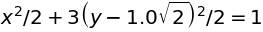

In [4]:
#Проверим, что у нас 'нормальный' эллипс
if B**2 - 4*A*C >= 0 or C*sp.Matrix([[A, B/2, D/2], [D/2, C, E/2], [D/2, E/2, F]]).det() >= 0:
  sys.exit("Эллипс мнимый или вырожденный")  

#Считаем параметры канонического уравнения

#Полуоси
a = -sp.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F) * (A + C + sp.sqrt((A - C)**2 +B**2))) / (B**2 - 4*A*C)
b = -sp.sqrt(2*(A*E**2 + C*D**2 - B*D*E + (B**2 - 4*A*C)*F) * (A + C - sp.sqrt((A - C)**2 +B**2))) / (B**2 - 4*A*C)

#Угол поворота и новый центр симметрии
theta = sp.atan((C - A - sp.sqrt((A - C)**2 + B**2)) / B)
Xc = (2*C*D - B*E) / (B**2 - 4*A*C)
Yc = (2*A*E - B*D) / (B**2 - 4*A*C)
Xr = Xc*sp.cos(theta) - Yc*sp.sin(theta)
Yr = Xc*sp.sin(theta) + Yc*sp.cos(theta)

if a > b: 
  Xr,Yr = Yr,Xr

print('Каноническое уравнение: ')
Eqc = sp.Eq((x - Xr)**2 / a**2 + (y - Yr)**2 / b**2, 1)
Eqc

# Построение

Для построение эллипса как множества точек удобно применить параметрическое уравнение
$
\begin{cases}
     x(t) = a\cos{t} &\\
     y(t) = b\sin{t} & \\     
\end{cases}
$
$0 \leqslant t \leqslant 2\pi$

![]https://upload.wikimedia.org/wikipedia/commons/5/57/Parametric_ellipse.gif)

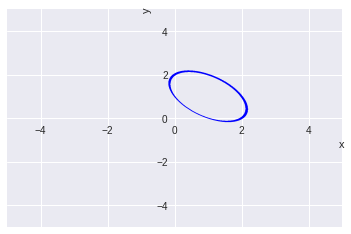

In [5]:
sp.plot_implicit(A*x**2 + B*x*y + C*y**2 + D*x + E*y + F)

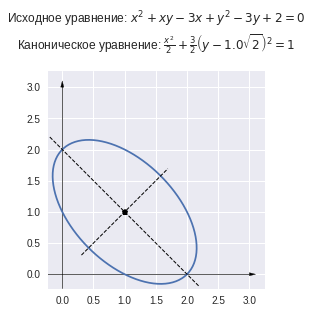

In [6]:
RN = 100
phi, a, b = float(theta), float(a), float(b)

#Эллипс
t = np.linspace(0, 2*np.pi, RN)
Xp, Yp = a*np.cos(t), b*np.sin(t)
Xp, Yp = Xc + np.cos(phi)*Xp - np.sin(phi)*Yp, Yc + np.sin(phi)*Xp + np.cos(phi)*Yp
plt.plot(Xp, Yp)

#Оси
plt.arrow(np.min(Xp) * 1.5, 0, np.max(Xp) * 1.5, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, np.min(Yp) * 1.5, 0, np.max(Yp) * 1.5, head_width=0.05, head_length=0.1, fc='k', ec='k')

#Вертикальная ось
Yl2, Xl2 = np.linspace(-np.min([a,b]) * 1.2, np.min([a,b]) * 1.2, RN), np.zeros(RN)
Xl2, Yl2 = Xc + np.cos(phi)*Xl2 - np.sin(phi)*Yl2, Yc + np.sin(phi)*Xl2 + np.cos(phi)*Yl2
plt.plot(Xl2, Yl2, 'k--', linewidth=1.0)

#Горизонтальная ось
Xl1, Yl1 = np.linspace(-np.max([a,b]) * 1.2, np.max([a,b]) * 1.2, RN), np.zeros(RN)
Xl1, Yl1 = Xc + np.cos(phi)*Xl1 - np.sin(phi)*Yl1, Yc + np.sin(phi)*Xl1 + np.cos(phi)*Yl1
plt.plot(Xl1, Yl1, 'k--', linewidth=1.0)

#Центр симметрии
plt.plot(Xc, Yc, 'kp')

#Заголовок
Title = "Исходное уравнение: " + '$' + sp.latex(Eq) + '$' + '\n'
Title += "Каноническое уравнение: " + '$' + sp.latex(Eqc) + '$' + '\n'
plt.title(Title)

plt.axis('scaled')
plt.gca().set_xlim([np.min(Xp) * 1.51, np.max(Xp) * 1.51])
plt.gca().set_ylim([np.min(Yp) * 1.51, np.max(Yp) * 1.51])
plt.draw()

# $\LaTeX$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Ellipse_parameters_3.svg/420px-Ellipse_parameters_3.svg.png)

**Эллипс** - геометрическое место точек $M$ евклидовой плоскости, дли которых сумма расстояний до двух данных точек $F_1$ и $F_2$ (называемых фокусами) постоянна и больше расстояния между фокусами. 

Для любого эллипса можно найти декартову систему координат такую, что эллипс будет описываться **каноническим уравнением** $\frac{x^2}{a^2} + \frac{y^2}{b^2}=1$, центр эллипса будет совпадать с началом координат, а оси эллипса с осями координат

---

*  Проходящий через фокусы эллипса отрезок $AB$, концы которого лежат на эллипсе, называется **большой осью** данного эллипса.

*   Отрезок $CD$, перпендикулярный большой оси эллипса, проходящий через центральную точку большой оси, концы которого лежат на эллипсе, называется **малой осью** эллипса

* Точка пересечения большой и малой осей эллипса называется его **центром**

* Отрезки, проведённые из центра эллипса к вершинам на большой и малой осях с длинами $a$ и $b$ называются, соответственно, **большой полуосью** и **малой полуосью**

* Расстояния $r_1$ и $r_2$ от каждого из фокусов до данной точки на эллипсе называются **фокальными радиусами** в этой точке

* Расстояние $c=\frac{|F_1F_2|}{2}$ называется **фокальным расстоянием**, $a^2=b^2+c^2$

* Величина  $e=c/a=\sqrt{1-\frac{b^2}{a^2}}$, $(0 \leqslant e < 1)$ называется **эксцентриситетом**

* **Диаметром** эллипса называют произвольную хорду, проходящую через его центр

* **Радиус** эллипса в данной точке это отрезок, соединяющий центр эллипса с точкой, а также его длина, которая вычисляется по формуле $r=\frac{ab}{\sqrt{b^2\cos^2\phi + a^2\sin^2\phi}} = \frac{b}{\sqrt{1-e^2\cos^2\phi}}$

* **Фокальным параметром** $p=\frac{b^2}{a}$ называется половина длины хорды, проходящей через фокус и перпендикулярной большой оси эллипса

---

**Соотношения между характеристиками эллипса**

\begin{array}[t]{|l|c|c|c|c|c|c|}
\hline
 & a & b & c & p & r_p & r_a \\ \hline
a\text{ - большая полуось} & a & \frac{b}{\sqrt{1-e^2}} & \frac{c}{e} &\frac{p}{1-e^2} & \frac{r_p}{1-e} & \frac{r_a}{1+e} \\ \hline
b\text{ - малая полуось} & a\sqrt{1-e^2} & b & \frac{c\sqrt{1-e^2}}{e} & \frac{p}{1-e^2} & r_p\sqrt{\frac{1+e}{1-e}} & r_a\sqrt{\frac{1-e}{1+e}} \\ \hline
c\text{ - фокальное расстояние} & ae & \frac{be}{\sqrt{1-e^2}} & c & \frac{pe}{1-e^2} & \frac{r_pe}{1-e} & \frac{r_ae}{1+e} \\ \hline
p\text{ - фокальный параметр} & a(1-e^2) & b\sqrt{1-e^2} & c\frac{1-e^2}{e} & p & r_p(1+e) & r_a(1-e) \\ \hline
r_p\text{ - перифокусное расстояние} & a(1-e) & b\sqrt{\frac{1-e}{1+e}} & c\frac{1-e}{e} & \frac{p}{1+e} & r_p & r_a\frac{1-e}{1+e} \\ \hline
r_a\text{ - апофокусное расстояние} & a(1+e) & b\sqrt{\frac{1+e}{1-e}} & c\frac{1+e}{e} & \frac{p}{1-e} & r_p\frac{1+e}{1-e} & r_a \\ \hline
\end{array}

---

**Длина дуги эллипса**

$$\ell = a\int_{t_1}^{t_2} \sqrt{1-e^2\cos^2t} dt $$

Этот интеграл принадлежит семейству эллиптических интегралов, которые в элементарных функциях не выражаются.

Формула для вычисления периметра эллипса

$$\mathcal{L}=\pi(a+b) \left(1 + \sum_{n=1}^{\infty} \left[ \frac{(2n-1)!!}{(2n-1)2^nn!}\left(\frac{a-b}{a+b}\right)^n \right] ^2\right)$$